# Exploratory Data Analysis Part 1

# What is Exploration Data Analysis (EDA)
Exploratory Data Analysis, or EDA for short, is the process of cleaning and reviewing data to derive insights such as descriptive statistics and correlation and generate hypotheses for experiments. EDA results often inform the next steps for the dataset, whether that be generating hypotheses, preparing the data for use in a machine learning model, or even throwing the data out and gathering new data!
### Exploratory Data Analysis
The process of reviewing and cleaning data to ....
- derive insights
- generate hypothesis                                                                                                                                                                                                                                                                                                                   

#### Remember from the last lecture (Lecture3), we can explore the data using various Pandas methods or attributes such as .head(), .info(), .describe(), .shape, etc.
### **Gathering more .info()**

In [1]:
import pandas as pd
book = pd.read_csv('clean_books.csv')
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


- Apart from exploring the initial statistics summary, it is also effective to visualize the data.
- Try the following codes.

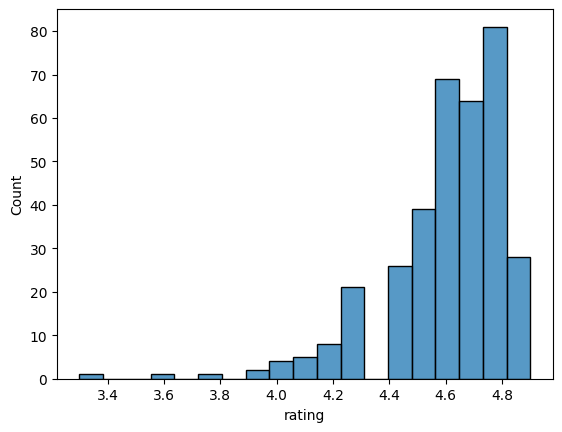

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
books = pd.read_csv('clean_books.csv')
sns.histplot(data=books, x='rating')
plt.show()
#You may add binwdith to histplot to change percentage point.


### A close look at categorial columns

In [3]:
books.value_counts('genre')

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

For .value_counts(), remember we can select a specific column to get a closer look at the information. 
Try. 


In [4]:
books['genre'].value_counts()

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

A new version of Pandas also supports

In [5]:
books.value_counts('genre')

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

<div class="alert alert-block alert-info">
<H1> Page 6</H1>
<H1> Load clean_umployment.csv to unemployment and complete the following tasks.</H1>
<H3>
    <ul>
        <li>Import the seaborn visualization libraries.</li>
        <li>Create a histogram of the distribution of 2021 unemployment percentages across all countries in unemployment; show a full percentage (binwidth = 0.1) point in each bin.</li>
    </ul>
</H3>



</div>

In [6]:
import seaborn as sns

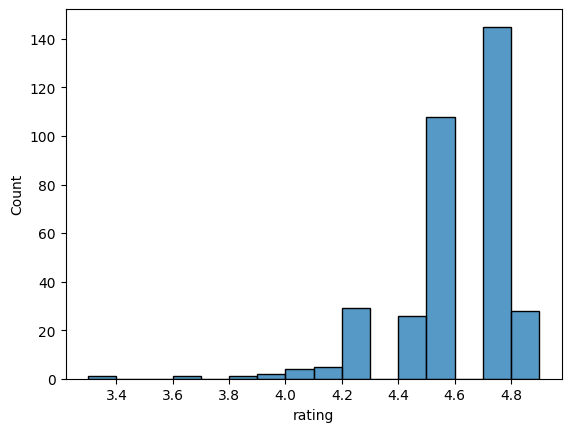

In [7]:
sns.histplot(data=books, x='rating', binwidth = 0.1)
plt.show()

# Data Validation

Data validation **<font color=red>is an important early step in EDA</font>**. We want to understand whether data types and ranges are as expected before we progress too far in our analysis!
### validating data type

In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


In [9]:
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

# Validating Categorial Data
- We can validate categorical data by comparing values in a column to a list of expected values using .isin(), which can either be applied to a Series as we'll show here or to an entire DataFrame. 
- For example, if the values in the genre column are limited to "Fiction" and "Non Fiction" by passing these genres as a list of strings to .isin(). The function returns a Series of the same size and shape as the original but with True and False in place of all values, depending on whether the value from the original Series was included in the list passed to .isin(). 
- We can see that some values are False.
</h4>

### Validating Categorial Data

In [10]:
books["genre"].isin(["Fiction","Non Fiction"])

0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool

Note we can use ~ to express it is not in … For example,

In [11]:
~books['genre'].isin(['Fiction','Non Ffiction'])

0       True
1      False
2       True
3      False
4       True
       ...  
345     True
346    False
347     True
348    False
349     True
Name: genre, Length: 350, dtype: bool

### Validating Categorial Data

In [12]:
books[books["genre"].isin(["Fiction","Non Fiction"])].head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,2011,Fiction


# Working with Numerical Data
#### We can select and view only the numerical columns in a DataFrame by calling the select_dtypes method and passing "number" as the argument.
 

### Validating numberical data

In [13]:
books.select_dtypes("number").head()

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018
3,4.7,2017
4,4.8,2019


# Working with Numerical Data
#### And we can view a more detailed picture of the distribution of year data using Seaborn's boxplot function. The boxplot shows the boundaries of each quartile of year data: as we saw using min and max, the lowest year is 2009 and the highest year is 2019. The 25th and 75th percentiles are 2010 and 2016 and the median year is 2013.


### Validating numberical data

In [14]:
books["year"].min()

np.int64(2009)

In [15]:
books["year"].max()

np.int64(2019)

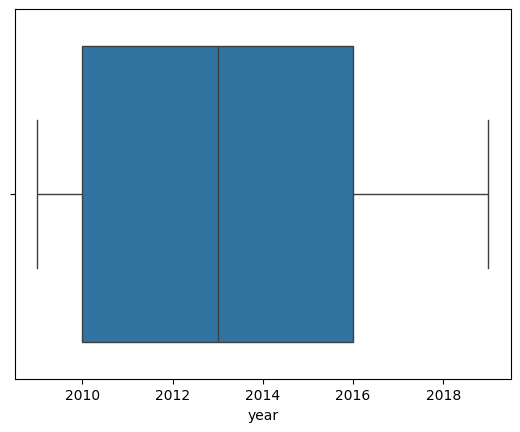

In [16]:
sns.boxplot(data=books, x="year")
plt.show()

### It is possible to view the year data grouped by a categorical variable such as genre by setting the y keyword argument. It looks like the children's books in our dataset have slightly later publishing years in general, but the range of years is the same for all genres.


### Validating numberical data

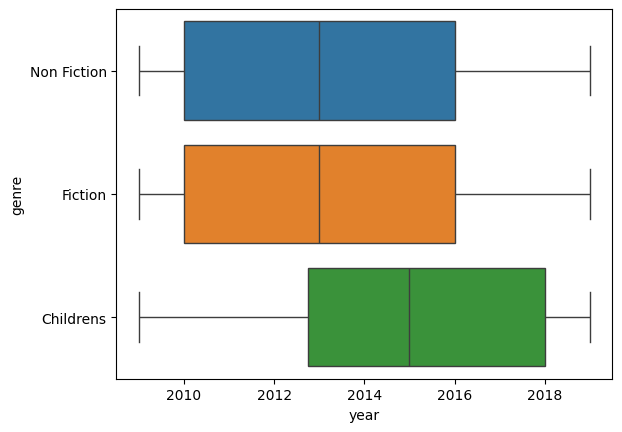

In [17]:
sns.boxplot(data=books, x="year", y="genre", hue="genre")
plt.show()

<div class="alert alert-block alert-info">
<h1> Page 14</h1>
<h1> Let’s Practice.</h1>
</div>
<h2> Validating continents</h2>
<h3>
    <ul>
        <li>Your colleague has informed you that the data on unemployment from countries in Oceania is not reliable, and you'd like to identify and exclude these countries from your unemployment data. The .isin() function can help with that!</li>
        <li>Your task is to use .isin() to identify countries that are not in Oceania. These countries should return True while countries in Oceania should return False. This will set you up to use the results of .isin() to quickly filter out Oceania countries using Boolean indexing.</li>
    </ul>
</h3>

<div class="alert alert-block alert-info">
<h3> Load clean_unemployment.csv to unemployment </h3>
</div>

In [18]:
unemployment = pd.read_csv('clean_unemployment.csv')
unemployment.value_counts('continent')

continent
Africa           53
Asia             47
Europe           39
North America    18
South America    12
Oceania           8
Name: count, dtype: int64

<div class="alert alert-block alert-info">
<h3>Define a Series of Booleans describing whether or not each continent is outside of Oceania; call this Series not_oceania.</h3>
</div>

In [19]:
not_oceania = unemployment[unemployment["continent"] != "Oceania" ]
not_oceania.value_counts('continent')

continent
Africa           53
Asia             47
Europe           39
North America    18
South America    12
Name: count, dtype: int64

<div class="alert alert-block alert-info">
<h3>Use Boolean indexing to print the unemployment DataFrame without any of the data related to countries in Oceania.</h3>
</div>

In [20]:
unemployment[ ~unemployment['continent'].isin(['Oceania']) ]

,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,VNM,Vietnam,Asia,1.11,1.00,1.03,1.32,1.26,1.85,1.85,1.87,1.16,2.04,2.39,2.17
178,YEM,"Yemen, Rep.",Asia,12.83,13.23,13.17,13.27,13.47,13.77,13.43,13.30,13.15,13.06,13.39,13.57
179,ZAF,South Africa,Africa,24.68,24.64,24.73,24.56,24.89,25.15,26.54,27.04,26.91,28.47,29.22,33.56
180,ZMB,Zambia,Africa,13.19,10.55,7.85,8.61,9.36,10.13,10.87,11.63,12.01,12.52,12.85,13.03


<div class="alert alert-block alert-info">

<h3>Print the minimum and maximum unemployment rates during 2021</h3>
</div>

In [186]:
# Print the minimum and maximum unemployment rates during 2021
print(unemployment['2021'].min(), unemployment['2021'].max())

0.26 33.56


<div class="alert alert-block alert-info">
<h3>Create a boxplot of 2021 unemployment rates, broken down by continent</h3>
</div>

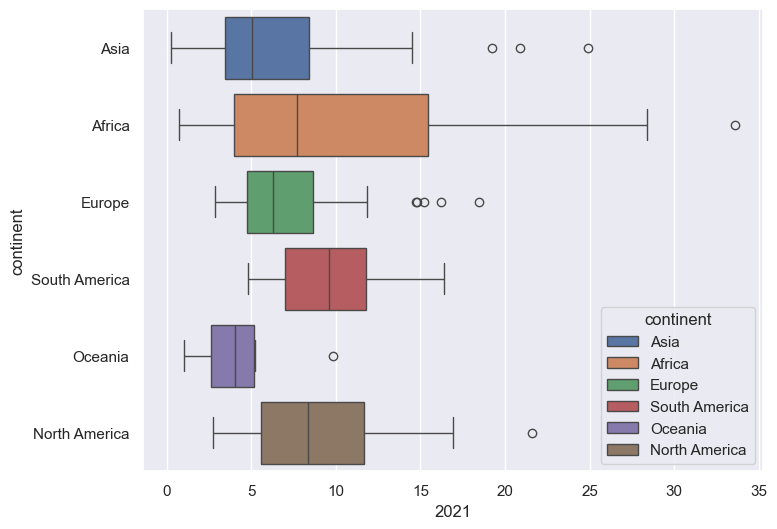

In [188]:
# Create a boxplot of 2021 unemployment rates, broken down by continent
sns.boxplot(data=unemployment, x='2021', y='continent', hue='continent')
plt.show()

#### We can explore the characteristics of subsets of data further with the help of the .groupby() function, which groups data by a given category, allowing the user to chain an aggregating function like .mean() or .count() to describe the data within each group.

#### The .agg() function, short for aggregate, allows us to apply aggregating functions. By default, it aggregates data across all rows in a given column and is typically used when we want to apply more than one function.


### Exploring groups of data
- groupby() group data by category
- Aggregating function indicates how to summarize grouped data

In [23]:
books.groupby("genre")[['rating', 'year']].mean()

,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


In [24]:
books.groupby('genre').mean(numeric_only = True)

,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


### Aggregating ungrouped data
- .agg() applies aggregating functions across a DataFrame

In [25]:
books[['rating', 'year']].agg(['std','mean',])

,rating,year
std,0.226941,3.284711
mean,4.608571,2013.508571


#### We can even use a dictionary to specify which aggregation functions to apply to which columns. The keys in the dictionary are the columns to apply the aggregation, and each value is a list of the specific aggregating functions to apply to that column.


### Specifying aggregation for columns

In [26]:
books.agg({"rating":["mean","std"],"year":["median"]})

,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


# Named summary columns

#### By combinding .agg() and .groupby() , we can apply these new exploration skill to grouped data. Maybe we'd like to show the mean  and standard diviation of rating for each book genre along with the median year. We can create named columns with our desired aggregations by using  the .agg() function and creating  named tuples inside it.

### Named summary columns

In [27]:
books.groupby("genre").agg( 
    mean_rating=("rating","mean"),
    std_rating=("rating","std"),
    median_year=("year","median") )

,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


# Visualizing categorical summaries
#### We can display similar information visually using a barplot. In Seaborn, bar plots will automatically calculate the mean of a quantitative variable like rating across grouped categorical data, such as the genre category we've been looking at. In Seaborn, bar plots also show a 95% confidence interval for the mean as a vertical line on the top of each bar.  

### Visualizing categorial summaries 

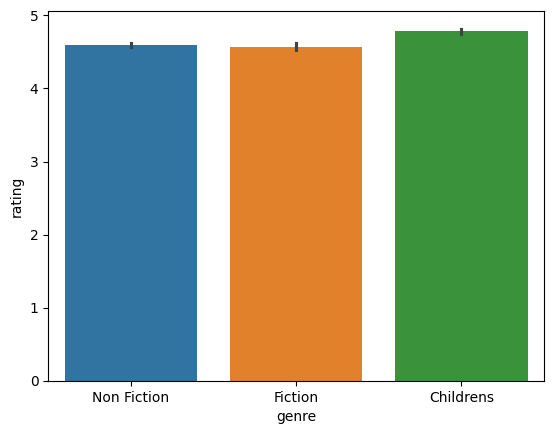

In [28]:
sns.barplot(data=books, x="genre", y="rating", hue="genre" )
plt.show()

<div class="alert alert-block alert-info">
    <h1>Page 19 </h1>
    <h1>Let’s Practice.</h1>
</div>


<div class="alert alert-block alert-info">
<h3>Print mean and standard deviation of the unemployment rates for each year. (using .agg() as shown in the example above) </h3>
</div>


In [189]:
numeric_cols = list(unemployment.select_dtypes("number").columns)
unemployment[numeric_cols].agg(["mean", "std"])

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
mean,8.409286,8.315440,8.317967,8.344780,8.179670,8.058901,7.925879,7.668626,7.426429,7.243736,8.420934,8.390879
std,6.248887,6.266795,6.367270,6.416041,6.284241,6.161170,6.045439,5.902152,5.818915,5.696573,6.040915,6.067192


<div class="alert alert-block alert-info">
<h3>
Print the mean and standard deviation of the unemployment rates for each year (not all data is shown below).
</h3>
</div>

In [190]:
unemployment.groupby('continent')[numeric_cols].agg(['mean', 'std'])

2010                 2011                 2012            \
                    mean       std       mean       std       mean       std   
continent                                                                      
Africa          9.343585  7.411259   9.369245  7.401556   9.240755  7.264542   
Asia            6.240638  5.146175   5.942128  4.779575   5.835319  4.756904   
Europe         11.008205  6.392063  10.947949  6.539538  11.325641  7.003527   
North America   8.663333  5.115805   8.563333  5.377041   8.448889  5.495819   
Oceania         3.622500  2.054721   3.647500  2.008466   4.103750  2.723118   
South America   6.870833  2.807058   6.518333  2.801577   6.410833  2.936508   

                    2013                 2014            ...      2017  \
                    mean       std       mean       std  ...      mean   
continent                                                ...             
Africa          9.132453  7.309285   9.121321  7.291359  ...  9.284528   
Asia            5.852128  4.668405   5.853191  4.681301  ...  6.171277   
Europe         11.466667  6.969209  10.971282  6.759765  ...  8.359744   
North America   8.840556  6.081829   8.512222  5.801927  ...  7.391111   
Oceania         3.980000  2.640119   3.976250  2.659205  ...  3.872500   
South America   6.335000  2.808780   6.347500  2.834332  ...  7.281667   

                             2018                2019                 2020  \
                    std      mean       std      mean       std       mean   
continent                                                                    
Africa         7.407620  9.237925  7.358425  9.264340  7.455293  10.307736   
Asia           5.277201  6.090213  5.409128  5.949149  5.254008   7.012340   
Europe         5.177845  7.427436  4.738206  6.764359  4.124734   7.470513   
North America  5.326446  7.281111  5.253180  7.095000  4.770490   9.297778   
Oceania        2.492834  3.851250  2.455893  3.773750  2.369068   4.273750   
South America  3.398994  7.496667  3.408856  7.719167  3.379845  10.275000   

                              2021            
                    std       mean       std  
continent                                     
Africa         7.928166  10.473585  8.131636  
Asia           5.699609   6.906170  5.414745  
Europe         4.071218   7.414872  3.947825  
North America  4.963045   9.155000  5.076482  
Oceania        2.617490   4.280000  2.671522  
South America  3.411263   9.924167  3.611624  

[6 rows x 24 columns]

### Named aggregations.
#### You've seen how .groupby() and .agg() can be combined to show summaries across categories. Sometimes, it's helpful to name new columns when aggregating so that it's clear in the code output what aggregations are being applied and where.

#### Your task is to create a DataFrame called continent_summary which shows a row for each continent. The DataFrame columns will contain the mean unemployment rate for each continent in 2021 as well as the standard deviation of the 2021 employment rate. And of course, you'll rename the columns so that their contents are clear!

#### From the given code – 
#### continent_summary = unemployment.groupby("continent").agg()


<div class="alert alert-block alert-info">
<h1>Page 20 <br>Try</h1>
<h3>
Create a column called mean_rate_2021, which shows the mean 2021 unemployment rate for each continent.
</h3>
</div>




In [31]:
continent_summary = unemployment.groupby("continent").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021 = ('2021', 'mean'),
)
print(continent_summary)

               mean_rate_2021
continent                    
Africa              10.473585
Asia                 6.906170
Europe               7.414872
North America        9.155000
Oceania              4.280000
South America        9.924167


<div class="alert alert-block alert-info">
<h3>
Create a column called std_rate_2021, which shows the standard deviation of the 2021 unemployment rate for each continent.
</h3>
</div>


In [32]:
continent_summary = unemployment.groupby("continent").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021 = ('2021', 'mean'),
    # Create the std_rate_2021 column
    std_rate_2021 = ('2021', 'std'),
)
print(continent_summary) 

               mean_rate_2021  std_rate_2021
continent                                   
Africa              10.473585       8.131636
Asia                 6.906170       5.414745
Europe               7.414872       3.947825
North America        9.155000       5.076482
Oceania              4.280000       2.671522
South America        9.924167       3.611624


# Visualizing categorical summaries

As you've learned in this lecture, Seaborn has many great visualizations for exploration, including a bar plot for displaying an aggregated average value by category of data.

In Seaborn, <font color=Blue>bar plots include a vertical bar indicating the 95% confidence interval for the categorical mean</font>. Since confidence intervals are calculated using both the number of values and the variability of those values, they give a helpful indication of how much data can be relied upon.


Your task is to create a bar plot to visualize the means and confidence intervals of unemployment rates across the different continents.



<div class="alert alert-block alert-info">
<h1>Page 21</h1>
<h3>
Create a bar plot showing continents on the x-axis and their respective average 2021 unemployment rates on the y-axis.
</h3>
</div>


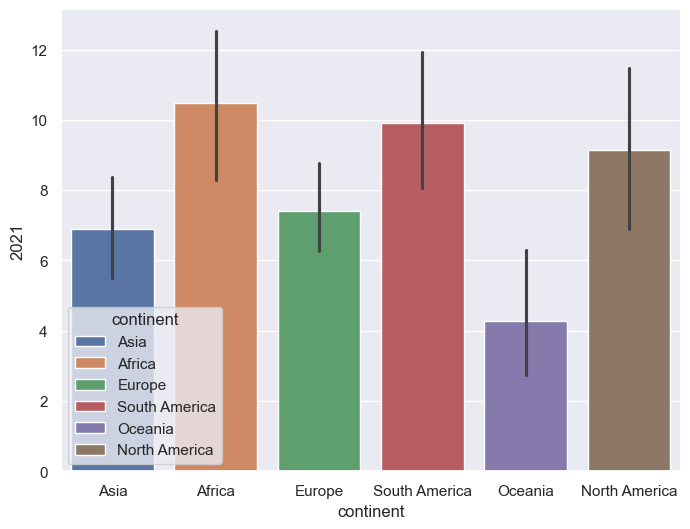

In [174]:
sns.barplot(data=unemployment, x='continent', y='2021', hue="continent" )
plt.show()

# Missing Data

- So, why is it <font color=red>important to deal with missing data</font>? Well, <font color=red>it can affect distributions</font>. As an example, we collect the heights of students at a high school. If we fail to collect the heights of the oldest students, who were taller than most of our sample, then our sample mean will be lower than the population mean. 
- Put another way, our data is less representative of the underlying population. In this case, <font color=red>parts of our population aren't proportionately represented. This misrepresentation can lead us to draw incorrect conclusions</font>, like thinking that, on average, students are shorter than they really are.


<H1><u>PPT page 22</u></h1>

## Why is missing data a problem?
- Affects distributions
   - Missing heights of taller students
- Less representative of the population
   - Certain groups disproportionately represented, e.g. lacking data on oldest students
- Can result in drawing incorrect conclusions

To highlight the impact of missing values, let's look at salaries by experience level. Now, let's compare this to the same data with some missing values. The y-axis shows that the largest salary is around 150000 dollars less in the second plot!


## Checking for missing value

In [34]:
salaries = pd.read_csv("ds_salaries_clean.csv")
print ( salaries.isna().sum())

Working_Year            12
Designation              5
Experience              33
Employment_Status       31
Employee_Location       28
Company_Size            40
Remote_Working_Ratio    24
Salary_USD              40
dtype: int64


<div class="alert alert-danger alert-info">
<H2> Strategies for addressing missing data</H2>
<H4>
<ul>
<li>Data missing values
   <ul><li> 5% or less of total values</li></ul>
</li>
<li>Impute Mean, Median, Mode
   <ul><li> Depends on distribution and context</li></ul>
</li>
<li>Impute by sub-group
   <ul><li> Different experience levels have different median salary</li></ul>
</li></H4>
</div>

To calculate our missing values threshold, we multiply the length of our DataFrame by five percent, giving us an upper limit of 30, as shown in the example below.
### Dropping missing values

In [35]:
print ( salaries.shape )
threshold = len ( salaries ) * 0.05
print ( threshold )

(607, 8)
30.35


We can use Boolean indexing to filter for columns with missing values less than or equal to this threshold, storing them as a variable called cols_to_drop. Printing cols_to_drop shows four columns. We drop missing values by calling .dropna(), passing cols_to_drop to the subset argument. We set <font color=red>inplace to True so the DataFrame is updated</font>.


### Dropping missing values

In [36]:
cols_to_drop = salaries.columns[salaries.isna().sum() <= threshold]
print (cols_to_drop)

Index(['Working_Year', 'Designation', 'Employee_Location',
       'Remote_Working_Ratio'],
      dtype='object')


In [37]:
salaries.dropna(subset=cols_to_drop, inplace=True)

In [38]:
print (salaries.shape)
print ( salaries.isna().sum())

(542, 8)
Working_Year             0
Designation              0
Experience              30
Employment_Status       29
Employee_Location        0
Company_Size            39
Remote_Working_Ratio     0
Salary_USD              37
dtype: int64


We then filter for the remaining columns with missing values, giving us four columns. To <font color=red>impute the mode for the first three columns, we loop through them and call the .fillna() method</font>, passing the respective column's mode and indexing the first item, which contains the mode, in square brackets.


### Imputing a summary statistic

In [39]:
cols_with_missing_values = salaries.columns[salaries.isna().sum() > 0]
print (cols_with_missing_values)

Index(['Experience', 'Employment_Status', 'Company_Size', 'Salary_USD'], dtype='object')


In [40]:
for col in cols_with_missing_values[:-1] :
    salaries[col] = salaries[col].fillna(salaries[col].mode()[0])

#### Checking for missing values again, we see salary_USD is now the only column with missing values and the volume has changed from 60 missing values to 41. This is because some rows may have contained missing values for our subset columns as well as salary, so they were dropped.


### Checking the remaining missing values

In [41]:
print ( salaries.isna().sum())
for col in cols_with_missing_values[:-1] :
    print ( col, salaries[col].mode()[0])


Working_Year             0
Designation              0
Experience               0
Employment_Status        0
Employee_Location        0
Company_Size             0
Remote_Working_Ratio     0
Salary_USD              37
dtype: int64
Experience Senior
Employment_Status FT
Company_Size M


We'll <font color=red>impute median salary by experience level by grouping salaries by experience and calculating the median</font>. We use the .to_dict() method, storing the grouped data as a dictionary. Printing the dictionary returns the median salary for each experience level, with executives earning the big bucks!


### Imputing by sub-group

In [42]:
salaries_dict = salaries.groupby("Experience")["Salary_USD"].median().to_dict()
print ( salaries_dict )

{'Entry': 56433.0, 'Executive': 151759.0, 'Mid': 73482.0, 'Senior': 128903.0}


We then impute using the .fillna() method, providing the Experience column and calling the .map() method, inside which we pass the salaries dictionary.


### Imputing by sub-group

In [43]:
salaries["Salary_USD"] = salaries["Salary_USD"].fillna(salaries["Experience"].map(salaries_dict))

### No more missing values!

In [191]:
print ( salaries.isna().sum())

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
Job_Category            0
dtype: int64


<div class="alert alert-block alert-info">
<h1>Page 29</h1>
<h1>Let’s Practice. </h1>
<h3>  Load airline_unclean.csv to planes with index_col = 0 argument. 
    <ul>
        <li>Print the number of missing values in each column of the DataFrame.
        <ul>
   <li>Calculate how many observations five percent of the planes DataFrame is equal to.</li>
   <li>Create cols_to_drop by applying boolean indexing to columns of the DataFrame with missing values less than or equal to the threshold.</li>
   <li>Use this filter to remove missing values and save the updated DataFrame. </li>
        </ul>
        </li>
    </ul>
</h3>
</div>


In [45]:
planes = pd.read_csv('airlines_unclean.csv', index_col = 0)
planes.head()
print(planes.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  object 
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(1), object(10)
memory usage: 999.4+ KB
None


In [46]:
# Print the number of missing values in each column of the DataFrame
print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64


In [47]:
# Calculate how many observations five percent of the planes DataFrame is equal to.
threshold = len(planes) * 0.05

In [48]:
# Create cols_to_drop by applying boolean indexing to columns of the DataFrame 
# with missing values less than or equal to the threshold.
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

In [49]:
# Use this filter to remove missing values and save the updated DataFrame
planes.dropna(subset=cols_to_drop, inplace=True)

In [50]:
print(planes.isna().sum())

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


# Strategies for remaining missing data.

So far, the five percent rule has worked nicely for the planes dataset, eliminating missing values from nine out of 11 columns!

Now, you need to decide what to do with the "Additional_Info" and "Price" columns, which are missing 300 and 368 values respectively.

You'll first take a look at what "Additional_Info" contains, then visualize the price of plane tickets by different airlines.

Run the following code to create boxplot for Price by Airline, and to observe mean value.


Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


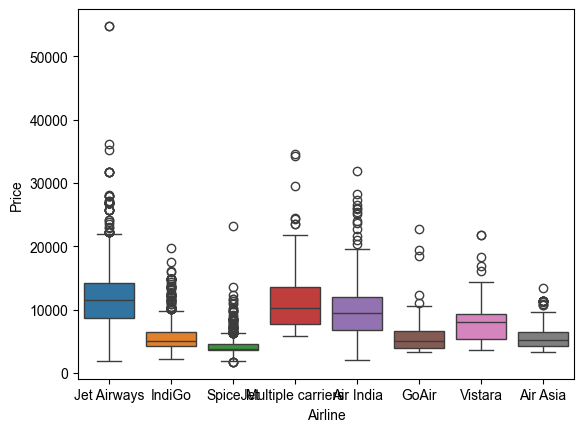

In [51]:
# Check the values of the Additional_Info column
print(planes["Additional_Info"].value_counts())

# Create a box plot of Price by Airline
sns.boxplot(data=planes, x='Airline', y='Price', hue='Airline')
sns.set(rc={"figure.figsize":(8, 6)})  #width=8,#height=6
plt.show() 

### Question
How should you deal with the missing values in "Additional_Info" and "Price"?
   - 1 Remove the “Additional_Info” column and impute the mean for missing values of “Price”
   - 2 Remove “No info” values from “Additional_Info” and impute the median for missing values of “Price”
   - 3 Remove the “Additional_Info” column and impute the mean by “Airline” for missing values of “Price”
   - 4 Remove the “Additional_Info” column and impute the median by “Airline” for missing values of “Price”

<div class="alert alert-block alert-info">
<h3> Let’s drop the “Additional_Info” column, with  planes = planes.drop(columns = ['Additional_Info'])</h3>
</div>

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


<div class="alert alert-block alert-info">
<h1> Page 32 </h1>
<h3> 
    <ul>
<li> Group planes by airline and calculate the median price.</li>
<li> Convert the grouped median prices to a dictionary.</li>
<li> Conditionally impute missing values for "Price" by mapping values in the "Airline column" based on prices_dict.</li>
<li> Check for remaining missing values.</li>
    </ul>
</h3>
</div>

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64
{'Air Asia': 5192.0, 'Air India': 9443.0, 'GoAir': 5003.5, 'IndiGo': 5054.0, 'Jet Airways': 11507.0, 'Multiple carriers': 10197.0, 'SpiceJet': 3873.0, 'Vistara': 8028.0}
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64


# Working with Categorial Data.
#### Now let's explore how to create and analyze categorical data. Recall that we can use the select_dtypes method to filter any non-numeric data. Chaining .head() allows us to preview these columns in our salaries DataFrame, showing columns such as Designation, Experience, Employment_Status, and Company_Size.


### Previewing Data

In [54]:
print( salaries.select_dtypes("object").head() )

                  Designation Experience Employment_Status Employee_Location  \
0              Data Scientist        Mid                FT                DE   
1  Machine Learning Scientist     Senior                FT                JP   
2           Big Data Engineer     Senior                FT                GB   
3        Product Data Analyst        Mid                FT                HN   
4   Machine Learning Engineer     Senior                FT                US   

  Company_Size  
0            L  
1            S  
2            M  
3            S  
4            L  


#### Let's examine frequency of values in the Designation column. The output is truncated by pandas automatically since there are so many different job titles!


### Job Title

 
#salaries.head()
salaries['Designation'].value_counts()

### We can count how many unique job titles there are using pandas .nunique() method. There are 50 in total!


In [56]:
print ( salaries["Designation"].nunique())

50


#### If we plot the graph using a bar chart, the fifth most popular job title, Research Scientist, appears less than 20 times.


Index(['Data Scientist', 'Data Engineer', 'Data Analyst',
       'Machine Learning Engineer', 'Research Scientist'],
      dtype='object', name='Designation')


<Axes: xlabel='Designation'>

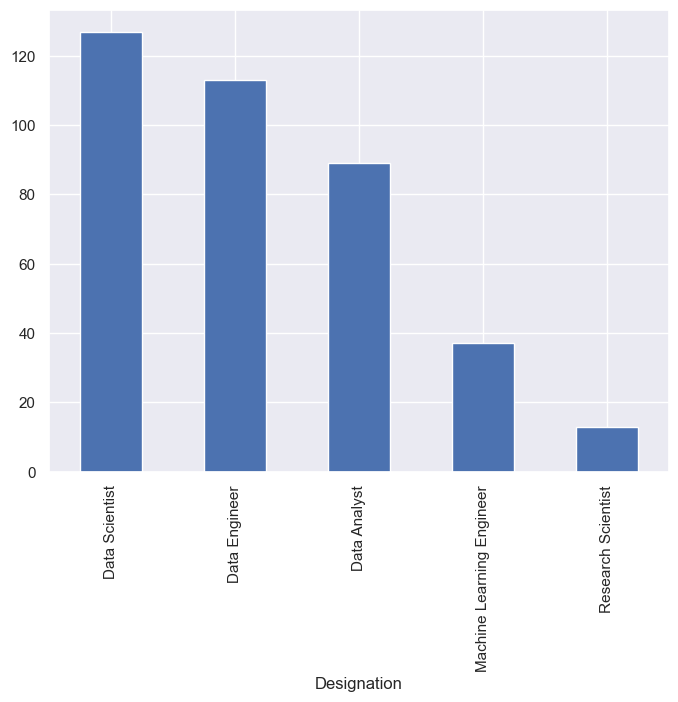

In [185]:
salaries_count = salaries['Designation'].value_counts().iloc[0:5]
print(salaries_count.index)
salaries_count.plot(kind='bar'  )
 


#### The current format of the data limits our ability to generate insights. We can use the <font color=red>pandas.Series.string.contains() method</font>, which allows us to search a column for a specific string or multiple strings. 

#### Say we want to know which job titles have Scientist in them. We use the str.contains() method on the Designation column, passing the word Scientist. This returns True or False values depending on whether the row contains this word.


- Current format limits our ability generate insights
- Pandas.Series.str.contains()
   - Search a column for a specific string or multiple string

In [58]:
salaries["Designation"].str.contains("Scientist")

0       True
1       True
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 542, dtype: bool

#### What if we want to filter for rows containing one or more phrases? 
####   - Words of Interest: Machine Learning or AI

In [59]:
salaries["Designation"].str.contains("Machine Learning|AI")

0      False
1       True
2      False
3      False
4       True
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 542, dtype: bool

#### Now we have a sense of how this method works, let's define a list of job titles we want to find. We start by creating a list with the different categories of data roles, which will become the values of a new column in our DataFrame.
### Finding multiple pharses in strings

In [60]:
job_categories = ['Data Science','Data Analytics',
                  'Data Engineering','Machine Learning',
                  'Managerial', 'Consultant']

#### We then need to create variables containing our filters. We will look for Data Scientist or NLP for data science roles. We'll use Analyst or Analytics for data analyst roles. We repeat this for data engineer, machine learning engineer, managerial, and consultant roles.
### Finding multiple pharses in strings

In [61]:
data_science = 'Scientist|NLP'
data_analyst = 'Analyst|Analytics'
data_engineer = 'Data Engineer|ETL|Architect|Infrastructure'
ml_engineer = 'Machine Learning|ML|Big Data|AI'
manager = 'Manager|Head|Director|Lead|Principal|Staff'
consultant = 'Consultant|Freelance'

### Finding multiple pharses in strings

In [62]:
conditions = [
    (salaries['Designation'].str.contains(data_science)),
    (salaries['Designation'].str.contains(data_analyst)),
    (salaries['Designation'].str.contains(data_engineer)),
    (salaries['Designation'].str.contains(ml_engineer)),
    (salaries['Designation'].str.contains(manager)),
    (salaries['Designation'].str.contains(consultant)),
]

### Creating the categorial column

In [63]:
import numpy as np
 
salaries['Job_Category'] = np.select(conditions, job_categories , default="unknown" )

### Preview Job Categories

In [65]:
print( salaries[["Designation","Job_Category"]].head())

                  Designation      Job_Category
0              Data Scientist      Data Science
1  Machine Learning Scientist      Data Science
2           Big Data Engineer  Data Engineering
3        Product Data Analyst    Data Analytics
4   Machine Learning Engineer  Machine Learning


### Visualizing job category frequency 

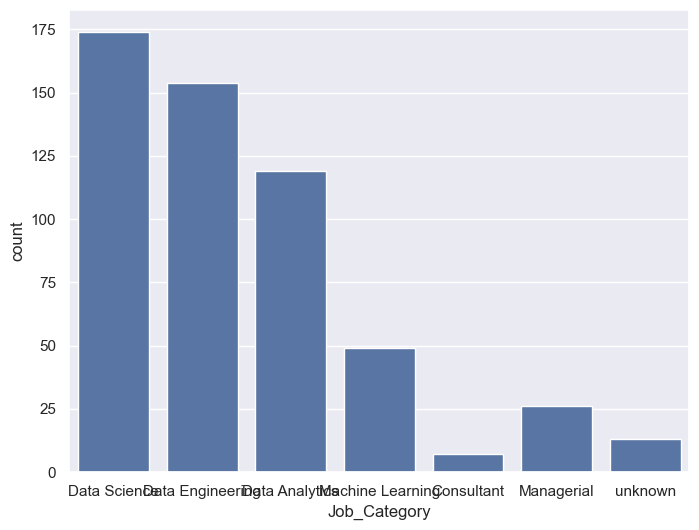

In [68]:
sns.countplot(data=salaries, x="Job_Category")
plt.show()

<div class="alert alert-block alert-info">
<h1> Page 38 </h1>
<h1> Let’s Practice (Load the data planes data set again)</h1>
<h3> Try (We select columns with object data type)</h3>
</div>

In [71]:
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes("object")

# Loop through columns
for col in non_numeric.columns:

  # Print the number of unique values
  print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())

Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  40
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  122
Number of unique values in Dep_Time column:  218
Number of unique values in Arrival_Time column:  1220
Number of unique values in Duration column:  362
Number of unique values in Total_Stops column:  5


<div class="alert alert-block alert-info">
<h3> The number of unique values in the "Duration" column of planes is shown.</h3>
</div>

In [73]:
planes['Duration'].value_counts()

Duration
2h 50m     425
1h 30m     304
2h 45m     281
2h 35m     265
2h 55m     262
          ... 
19h 50m      1
30h 10m      1
40h 20m      1
31h 55m      1
47h 40m      1
Name: count, Length: 362, dtype: int64

<div class="alert alert-block alert-info">
<h3> Then calling planes["Duration"].head(), we see the following values:</h3>
</div>

In [74]:
planes["Duration"].head()

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object

#### Looks like this won't be simple to convert to numbers. However, you could categorize flights by duration and examine the frequency of different flight lengths!
#### You'll create a <font color=red>"Duration_Category"</font> column in the <font color=red>planes</font> DataFrame. Before you can do this you'll need to create a list of the values you would like to insert into the DataFrame, followed by the existing values that these should be created from.

<div class="alert alert-block alert-info">
<h1>Page 39</h1> 
</div>

<div class="alert alert-block alert-info">
<h3> Create short_flights, a string to capture values of "0h", "1h", "2h", "3h", or "4h".</h3>
</div>

In [198]:
short_flights = "0h|1h|2h|3h|4h"

<div class="alert alert-block alert-info">
<h3> Create medium_flights to capture any values between five and nine hours..</h3>
</div>


In [199]:
medium_flights = "5h|6h|7h|8h|9h"

<div class="alert alert-block alert-info">
<h3> Create long_flights to capture any values from 10 hours to 16 hours inclusive.</h3>
</div>


In [200]:
long_flights = "10h|11h|12h|13h|14h|15h|16h"

### Adding duration categories

#### Now that you've set up the categories and values you want to capture, it's time to build a new column to analyze the frequency of flights by duration!

#### The variables flight_categories, short_flights, medium_flights, and long_flights that you previously created are needed.

#### Additionally, the following packages have been imported: 
##### pandas as pd
##### numpy as np
##### seaborn as sns 
##### matplotlib.pyplot as plt 

<div class="alert alert-block alert-info">
<h1>Page 40</h1>
<h3> Create conditions, a list containing subsets of planes["Duration"] based on short_flights, medium_flights, and long_flights.</h3>
</div>

In [197]:
flight_categories = ["Short-haul", "Medium-haul", "Long-haul"]
 
conditions = [
    (planes["Duration"].str.contains(short_flights)),   # "0h|1h|2h|3h|4h"
    (planes["Duration"].str.contains(medium_flights)),  # "5h|6h|7h|8h|9h"
    (planes["Duration"].str.contains(long_flights))     # "10h|11h|12h|13h|14h|15h|16h"
]

AttributeError: Can only use .str accessor with string values!

<div class="alert alert-block alert-info">
<h1>Create the "Duration_Category" column by calling a function that accepts your conditions list and flight_categories, setting values not found to "Extreme duration".</h1>
</div>

In [201]:
planes["Duration_Category"] = np.select(conditions, 
                                        flight_categories,
                                        default="Extreme duration")

<div class="alert alert-block alert-info">
<h1> Create a plot showing the count of each category.</h1>
</div>

  Duration Duration_Category
0      19h       Medium-haul
1   5h 25m       Medium-haul
2   4h 45m        Short-haul
3   2h 25m        Short-haul
4  15h 30m       Medium-haul


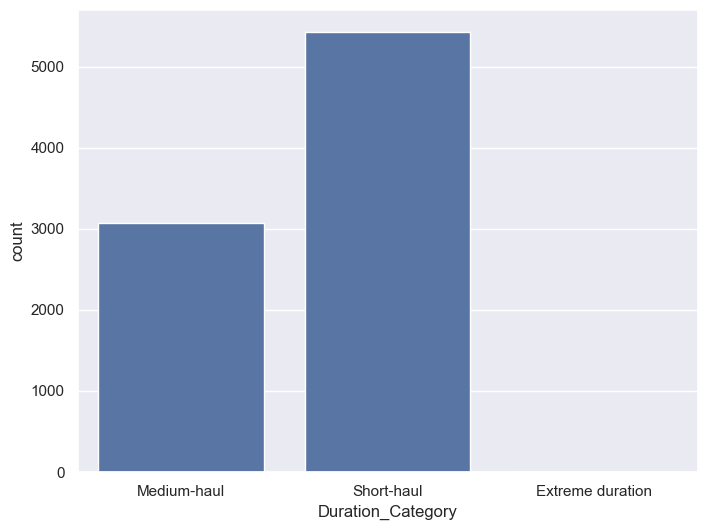

In [99]:
print(planes[['Duration','Duration_Category']].head(5))
sns.countplot(data=planes, x="Duration_Category")
plt.show()

# Working with Numerical Data.
#### It’s time to switch our focus to working with numeric data.


In [120]:
salary_ind = pd.read_csv("Salary_Rupee_USD.csv") 
salary_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            407 non-null    int64  
 1   Working_Year          407 non-null    int64  
 2   Designation           407 non-null    object 
 3   Experience            407 non-null    object 
 4   Employment_Status     407 non-null    object 
 5   Salary_In_Rupees      407 non-null    object 
 6   Employee_Location     407 non-null    object 
 7   Company_Location      407 non-null    object 
 8   Company_Size          407 non-null    object 
 9   Remote_Working_Ratio  407 non-null    int64  
 10  Salary_USD            407 non-null    float64
 11  Job_Category          407 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 38.3+ KB


#### To obtain Salary in USD we'll need to perform a few tasks. First, we need to remove the commas from the values in the Salary_In_Rupees column. Next, we change the data type to float. Lastly, we'll make a new column by converting the currency.


In [121]:
salary_ind["Salary_In_Rupees"].head()

0    20,700,000.00
1     8,680,000.00
2     1,590,000.00
3    11,900,000.00
4     5,730,000.00
Name: Salary_In_Rupees, dtype: object

### Convert Strings to Numbers
#### pd.Series.str.replace("characters to remove","character to replace them with")

In [123]:
salary_ind["Salary_In_Rupees"] = salary_ind["Salary_In_Rupees"].str.replace (",","")
print ( salary_ind["Salary_In_Rupees"].head() )

0    20700000.00
1     8680000.00
2     1590000.00
3    11900000.00
4     5730000.00
Name: Salary_In_Rupees, dtype: object


### Convert Strings to Numbers 

In [128]:
salary_ind["Salary_In_Rupees"] = salary_ind["Salary_In_Rupees"].astype(float)

- 1 indian Rupee = 0.012 US Dollar

In [129]:
salary_ind["Salary_USD"] = salary_ind["Salary_In_Rupees"] * 0.012

### Previewing the new column

In [130]:
print ( salary_ind[["Salary_In_Rupees","Salary_USD"]] )

     Salary_In_Rupees  Salary_USD
0          20700000.0    248400.0
1           8680000.0    104160.0
2           1590000.0     19080.0
3          11900000.0    142800.0
4           5730000.0     68760.0
..                ...         ...
402        12300000.0    147600.0
403        10000000.0    120000.0
404        10300000.0    123600.0
405        11900000.0    142800.0
406        15900000.0    190800.0

[407 rows x 2 columns]


# PAGE 43

### Add summary statistic into a DataFrame

In [134]:
salary_ind.groupby("Company_Size")["Salary_USD"].mean() 

Company_Size
L    114037.548387
M    111166.631579
S     70129.745455
Name: Salary_USD, dtype: float64

### Add summary statistic into a DataFrame

In [136]:
salary_ind["std_dev"] = salaries.groupby("Experience")["Salary_USD"].transform(lambda x: x.std())

In [139]:
print ( salary_ind[["Experience","std_dev"]].value_counts() )

Experience  std_dev      
SE          55493.515639     79
MI          55493.515639     60
SE          56422.443278     58
MI          56422.443278     28
EN          55493.515639     28
MI          41194.723375     24
SE          41194.723375     22
EN          56422.443278     15
            41194.723375     12
SE          126095.037338     9
EX          56422.443278      8
            55493.515639      5
EN          126095.037338     4
MI          126095.037338     4
EX          41194.723375      2
Name: count, dtype: int64


### Add summary statistic into a DataFrame

In [140]:
salary_ind["median_by_comp_size"] = salaries.groupby("Company_Size")["Salary_USD"].transform(lambda x: x.median())

In [141]:
print ( salary_ind[["Company_Size","median_by_comp_size"]].head() )

  Company_Size  median_by_comp_size
0            S              89750.0
1            M              63040.0
2            S             108351.0
3            L              63040.0
4            L              89750.0


<div class="alert alert-block alert-info">
<h1>Page 44</h1>
<h1> Complete the following tasks.</h1>
</div>

<div class="alert alert-block alert-info">
<h3> Print the first five values of the "Duration" column.</h3>
</div>

In [143]:
print(planes["Duration"].head())

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object


<div class="alert alert-block alert-info">
<h3> Remove "h",  "m", " " from the column and make the data format to be hh.mm</h3></div>

In [144]:
planes["Duration"] = planes["Duration"].str.replace("h", ".")
planes["Duration"] = planes["Duration"].str.replace("m", "")
planes["Duration"] = planes["Duration"].str.replace(" ", "")

<div class="alert alert-block alert-info">
<h3> Convert the column to float data type.</h3>
</div>

In [145]:
planes["Duration"] = planes["Duration"].astype(float)

<div class="alert alert-block alert-info">
<h3> Plot a histogram of "Duration" values using </h3>
</div>

In [146]:
print(planes['Duration'].head())

0    19.00
1     5.25
2     4.45
3     2.25
4    15.30
Name: Duration, dtype: float64


<Axes: xlabel='Duration', ylabel='Count'>

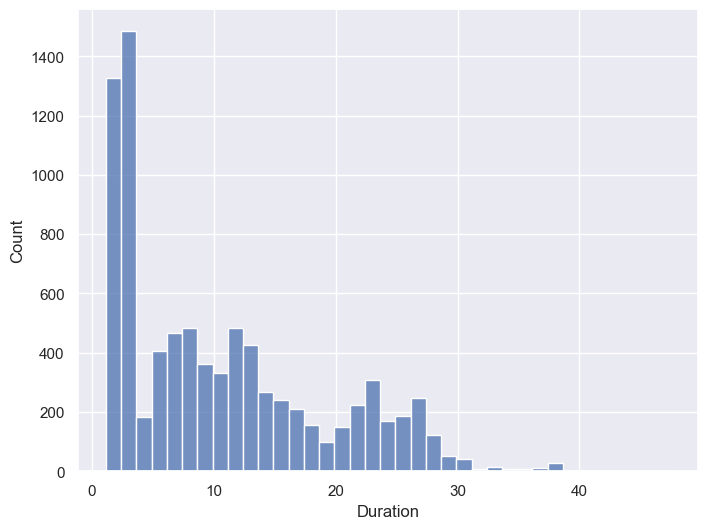

In [148]:
sns.histplot(data=planes, x="Duration")

### Adding descriptive statistics

#### Now <font color=red>"Duration"</font> and <font color=red>"Price"</font> both contain numeric values in planes DataFrame, you would like to calculate summary statistics for them that are conditional on values in other columns.


<div class="alert alert-block alert-info">
<h1>Page 45</h1>
    <h3> Add a column to planes containing the standard deviation of "Price" based on "Airline".</h3>
</div>

Airline            airline_price_st_dev
Jet Airways        4159.846432             3082
IndiGo             2245.529140             1632
Air India          3692.609285             1399
Multiple carriers  3558.323763              959
SpiceJet           1798.900648              653
Vistara            2888.915498              376
Air Asia           1979.826234              260
GoAir              2764.926625              147
Name: count, dtype: int64


<div class="alert alert-block alert-info">
<h3> Calculate the median for "Duration" by "Airline", storing it as a column called "airline_median_duration".</h3>
</div>

Airline            airline_median_duration
Jet Airways        13.20                      3082
IndiGo             2.55                       1632
Air India          15.50                      1399
Multiple carriers  10.15                       959
SpiceJet           2.30                        653
Vistara            3.10                        376
Air Asia           2.50                        260
GoAir              2.55                        147
Name: count, dtype: int64


<div class="alert alert-block alert-info">
<h3> Find the mean "Price" by "Destination", saving it as a column called "price_destination_mean".</h3>
</div>

Destination  price_destination_mean
Cochin       10473.585927              3631
Banglore     9093.622872               2291
Delhi        5248.541082                998
New Delhi    11579.306944               720
Hyderabad    5190.274021                562
Kolkata      4907.156863                306
Name: count, dtype: int64


count       542.000000
mean     107202.904059
std       65652.639504
min        2730.000000
25%       62067.250000
50%       97235.500000
75%      138416.250000
max      572900.000000
Name: Salary_USD, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 542 entries, 0 to 606
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          542 non-null    float64
 1   Designation           542 non-null    object 
 2   Experience            542 non-null    object 
 3   Employment_Status     542 non-null    object 
 4   Employee_Location     542 non-null    object 
 5   Company_Size          542 non-null    object 
 6   Remote_Working_Ratio  542 non-null    float64
 7   Salary_USD            542 non-null    float64
 8   Job_Category          542 non-null    object 
dtypes: float64(3), object(6)
memory usage: 58.5+ KB
None


# Page 46
# Handling Outliers


## What is outlier ?
<ul> <li> An Observation for away from other data point 
    <ul>
        <li> Medain house price:  USD 400,000</li>
        <li> Outlier house price:  USD 5,000,000</li>
    </ul>
</li>
    <li> Should consider why the value is different:
    <ul><li>Location, number of bedrooms, overall size, etc.</li></ul></li>
</ul>

### Using descriptive statistics

In [155]:
print ( salary_ind["Salary_USD"].describe() )

count       407.000000
mean     106495.783784
std       65454.622882
min        3816.000000
25%       60900.000000
50%       97440.000000
75%      142800.000000
max      429600.000000
Name: Salary_USD, dtype: float64


#### We can define an outlier mathematically. First, we need to know the interquartile range, or IQR, which is the difference between the 75th and 25th percentiles


## Using Interquartile range 
### Interquartile range ( IQR )
#### - IQR = 75th-25th percentile
#### Recall that these percentiles are included in box plots, like this one showing salaries of data professionals.  

# PAGE 47

### IQR in box plots

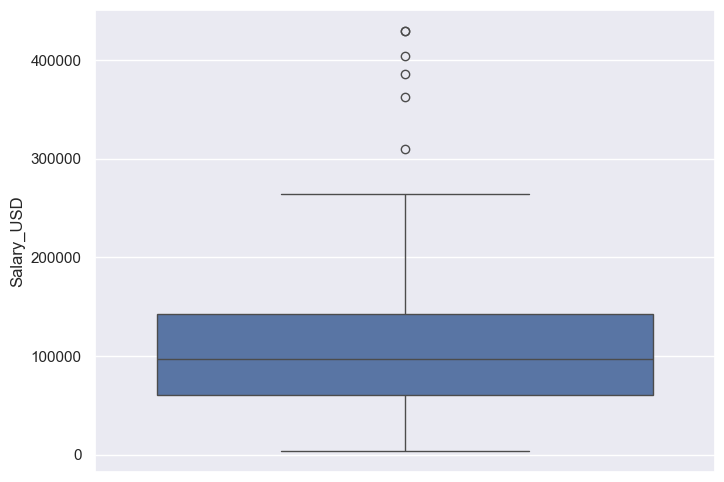

In [157]:
sns.boxplot( data=salary_ind, y="Salary_USD")
plt.show() 

### Once we have the IQR, we can find an upper outlier by looking for values above the sum of the 75th percentile plus 1.5  times the IQR. Lower outliers have values below the sum of the 25th percentile minus 1.5 times the IQR


## Using Interquartile range 
### Interquartile range ( IQR )
#### - IQR = 75th-25th percentile
#### - Upper Quanrtile > 75th percentile + (1.5 * IQR)
#### - Lower Quanrtile < 25th percentile - (1.5 * IQR)

### Identify thresolds

In [158]:
#75th percentile
seventy_fifth = salaries['Salary_USD'].quantile(0.75)
#25th percentile
twenty_fifth = salaries['Salary_USD'].quantile(0.25)
#Interquartile range
salaries_iqr = seventy_fifth - twenty_fifth
print(salaries_iqr)

76349.0


### Identify outliers

In [159]:
#upper threshold
upper = seventy_fifth + (1.5*salaries_iqr)

#lower threshold
lower = twenty_fifth - (1.5*salaries_iqr)

print(upper, lower)

252939.75 -52456.25


### Subsetting our data

In [164]:
salaries[(salaries['Salary_USD'] < lower) | (salaries['Salary_USD'] > upper)] [['Experience','Employee_Location','Salary_USD']]

,Experience,Employee_Location,Salary_USD
25,Executive,US,310321.0
63,Senior,US,393392.0
78,Mid,US,257805.0
97,Mid,US,429675.0
157,Mid,US,403895.0
225,Executive,US,397211.0
252,Executive,US,572900.0
519,Senior,US,362837.0
523,Senior,US,386708.0
534,Senior,US,254368.0


<h1>  Why look for outlier ? </h1>
<h3>
<ul>
<li>Outliers are extreme values</li>
<ul>
<li>may not accurately represent our data</li>
</ul>
<li>Can change the mean and standard deviation</li>
<li>Statistical testa and machine learning models need norally distributed data</li>    
</ul>
</h3>
<h1> What to do about outlier?</h1>
<h1> Questions to ask:</h1>
<h3>
<ul>
<li>Why do these outlier exist?</li>
<ul>
<li>More senior roles/ different countries pay more</li>
<li>Consider leaving them in the dataset</li>
</ul>
    <li>Is the data accurate
        <ul>
        <li>Could there have been an error in data collection ?</li>    
            <ul><li>If so, remove them</li></ul>
        </ul>
    </li>
</ul>
</h3>


# Dropping outlier

In [165]:
no_outliers = salaries[(salaries['Salary_USD'] > lower)&(salaries['Salary_USD']<upper)]
print(no_outliers['Salary_USD'].describe())  

count       532.000000
mean     102133.199248
std       53400.692195
min        2730.000000
25%       61693.500000
50%       95483.000000
75%      133736.500000
max      248257.000000
Name: Salary_USD, dtype: float64


#  Removing outliers

#### While removing outliers isn't always the way to go, for your analysis, you've decided that you will only include flights where the "Price" is not an outlier.

#### Therefore, you need to find the upper threshold and then use it to remove values above this from the planes DataFrame.


<div class="alert alert-block alert-info">
<h1>Page 50 </h1>
<h3> Find the 75th and 25th percentiles, saving as price_seventy_fifth and price_twenty_fifth, respectively. </h3>
</div>

<div class="alert alert-block alert-info">
<h3> Calculate the IQR, storing it as prices_iqr.</h3></div>

<div class="alert alert-block alert-info">
<h3> Calculate the upper and lower outlier thresholds.</h3>
</div>

<div class="alert alert-block alert-info">
<h3> Remove the outliers from planes</h3>
</div>

count     8508.000000
mean      9033.468441
std       4366.382574
min       1759.000000
25%       5228.000000
50%       8452.000000
75%      12242.000000
max      54826.000000
Name: Price, dtype: float64
